In [1]:
import anndata as ad
import scanpy as sc

In [2]:
%run -i 0_functions.py

Next, we will calculate HVGs per replicate, and calculate the union of all of them.

# 1. Calculate HVG's

In [3]:
rep1 = ad.read_h5ad("data/rep1_mono_ery.h5ad")
rep2 = ad.read_h5ad("data/rep2_mono_ery.h5ad")
rep3 = ad.read_h5ad("data/rep3_mono_ery.h5ad")

In [4]:
rep1_mono = ad.read_h5ad("data/rep1_mono.h5ad")
rep2_mono = ad.read_h5ad("data/rep2_mono.h5ad")
rep3_mono = ad.read_h5ad("data/rep3_mono.h5ad")

rep1_ery = ad.read_h5ad("data/rep1_ery.h5ad")
rep2_ery = ad.read_h5ad("data/rep2_ery.h5ad")
rep3_ery = ad.read_h5ad("data/rep3_ery.h5ad")

In [5]:
# calculate hvgs
sc.pp.highly_variable_genes(rep1, n_top_genes=1000)
sc.pp.highly_variable_genes(rep2, n_top_genes=1000)
sc.pp.highly_variable_genes(rep3, n_top_genes=1000)   

/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/scanpy/preprocessing/_highly_variable_genes.py:307: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/scanpy/preprocessing/_highly_variable_genes.py:307: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/scanpy/preprocessing/_highly_variable_genes.py:307: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


In [6]:
rep1_hvg = rep1[:, rep1.var["highly_variable"] == True]
rep2_hvg = rep2[:, rep2.var["highly_variable"] == True]
rep3_hvg = rep3[:, rep3.var["highly_variable"] == True]

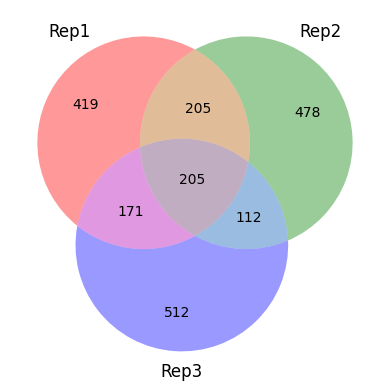

In [8]:
from matplotlib_venn import venn3

rep1_hvg_genes = set(rep1_hvg.var_names)
rep2_hvg_genes = set(rep2_hvg.var_names)
rep3_hvg_genes = set(rep3_hvg.var_names)

venn3([rep1_hvg_genes, rep2_hvg_genes, rep3_hvg_genes], set_labels = ["Rep1", "Rep2", "Rep3"])

In [9]:
hvg_genes = rep1_hvg_genes | rep2_hvg_genes | rep3_hvg_genes
len(hvg_genes)

2102

In [10]:
# select hvg_genes
rep1_mono_hvg = rep1_mono[:, rep1_mono.var_names.isin(hvg_genes)]
rep2_mono_hvg = rep2_mono[:, rep2_mono.var_names.isin(hvg_genes)]
rep3_mono_hvg = rep3_mono[:, rep3_mono.var_names.isin(hvg_genes)]

rep1_ery_hvg = rep1_ery[:, rep1_ery.var_names.isin(hvg_genes)]
rep2_ery_hvg = rep2_ery[:, rep2_ery.var_names.isin(hvg_genes)]
rep3_ery_hvg = rep3_ery[:, rep3_ery.var_names.isin(hvg_genes)]

In [11]:
rep1_mono_hvg, rep2_mono_hvg, rep3_mono_hvg

(View of AnnData object with n_obs × n_vars = 3721 × 2082
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Mono'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Mono_pseudotime', 'pseudocells_100_Mono_pseudotime_index', 'pseudocells_100_Mono_pseudotime_values'
     obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs', 'tsne'
     varm: 'pseudocells_100_Mono',
 View of AnnData object with n_obs × n_vars = 3794 × 2075
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Mono'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Mono_pseudotime', 'pseudocells_100_Mono_pseudotime_index', 'pseudocells_100_Mono_pseudotim

In [12]:
rep1_ery_hvg, rep2_ery_hvg, rep3_ery_hvg

(View of AnnData object with n_obs × n_vars = 2113 × 2082
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Ery'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Ery_pseudotime', 'pseudocells_100_Ery_pseudotime_index', 'pseudocells_100_Ery_pseudotime_values'
     obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs', 'tsne'
     varm: 'pseudocells_100_Ery',
 View of AnnData object with n_obs × n_vars = 3203 × 2075
     obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'cell_type', 'milestones', 'pseudotime', 'Ery'
     uns: 'cell_type_colors', 'cluster_colors', 'clusters_colors', 'ct_colors', 'id', 'lineage_labels', 'palantir_branch_probs_cell_types', 'pseudocells', 'pseudocells_100_Ery_pseudotime', 'pseudocells_100_Ery_pseudotime_index', 'pseudocells_100_Ery_pseudotime_values'

In [13]:
write_with_pc(rep1_mono_hvg, "data/rep1_mono_hvg")
write_with_pc(rep2_mono_hvg, "data/rep2_mono_hvg")
write_with_pc(rep3_mono_hvg, "data/rep3_mono_hvg")

write_with_pc(rep1_ery_hvg, "data/rep1_ery_hvg")
write_with_pc(rep2_ery_hvg, "data/rep2_ery_hvg")
write_with_pc(rep3_ery_hvg, "data/rep3_ery_hvg")   